+# Task 1
### a) Import all the required modules. (MM - 1)
### b) Read the file and store the data in a pandas dataframe called birth_data. Headers given at Row 0, should be the column names. ead the complete Data in different columns. (MM - 1)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import scipy as stats

In [2]:
birth_data=pd.read_csv("oneyeardailybirthdata.csv")

In [3]:
birth_data.head()

,Date,Daily total female births in California 1959
0,1959-01-01,35.0
1,1959-01-02,32.0
2,1959-01-03,30.0
3,1959-01-04,31.0
4,1959-01-05,44.0


# Task 2
## a) Check the Data types and values. Verify the lower 2 rows of the Dataframe. What did you find?Remove the last 2 rows of the birth_data Dataframe. (MM - 3)

In [4]:
birth_data.dtypes

Date                                             object
Daily total female births in California 1959    float64
dtype: object

In [5]:
birth_data.tail()

,Date,Daily total female births in California 1959
362,1959-12-29,48.0
363,1959-12-30,55.0
364,1959-12-31,50.0
365,NaN,NaN
366,Daily total female births in California,1959.0


In [6]:
birth_data=birth_data.drop(birth_data.index[365:])

In [7]:
birth_data['Date'] = pd.to_datetime(birth_data['Date'])

In [8]:
birth_data.tail()

,Date,Daily total female births in California 1959
360,1959-12-27,37.0
361,1959-12-28,52.0
362,1959-12-29,48.0
363,1959-12-30,55.0
364,1959-12-31,50.0


## b) Find out the number of observations in the birth_data dataframe and no. of columns. (MM – 5)

In [9]:
print("number of observations in the birth_data dataframe:-",birth_data.shape[0])
print(" no. of columns in the birth_data dataframe:-",birth_data.shape[1])

number of observations in the birth_data dataframe:- 365
 no. of columns in the birth_data dataframe:- 2


# Task 3
## a) Set Date column as the index for the birth_data dataframe and also modify birth_data to have only one column named "DailyCount". (MM - 3)

In [10]:
birth_data=birth_data.set_index('Date')
birth_data['DailyCount']=birth_data['Daily total female births in California 1959']
del birth_data['Daily total female births in California 1959']

In [11]:
birth_data.head()

,DailyCount
Date,
1959-01-01,35.0
1959-01-02,32.0
1959-01-03,30.0
1959-01-04,31.0
1959-01-05,44.0


## b) Find out the number of observations in the birth_data dataframe and no. of columns. (MM - 2)

In [12]:
print("number of observations in the birth_data dataframe:-",birth_data.shape[0])
print("no. of columns in the birth_data dataframe:-",birth_data.shape[1])

number of observations in the birth_data dataframe:- 365
no. of columns in the birth_data dataframe:- 1


# Task 4

## a) Check the basic Statistics of the birth_data dataframe and describe it in your words. (MM - 5)

In [13]:
birth_data.describe()

,DailyCount
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


In [14]:
np.var(birth_data)

DailyCount    53.848947
dtype: float64

No. of obervations in the dataframe is 365 and having no NaN values in it.

Mean of DailyCount is 41.980822.

standard deviation is 7.348257.(means the values may lie within the range fo 7.34 approx form mean value on both the sides)

Minimum value in DailyCount is 23.

Maximum value in DailyCount is 73.

50 percentile of DailyCount is 42.

75 percentile of DailyCount is 46.

25 percentile of DailyCount is 37.

Variance for DailyCount is 53.848947.


## b) Plot the birth_data and check if is it Stationary or has some trend /pattern /seasonality /cyclic effect. Describe your answer. (MM - 10)

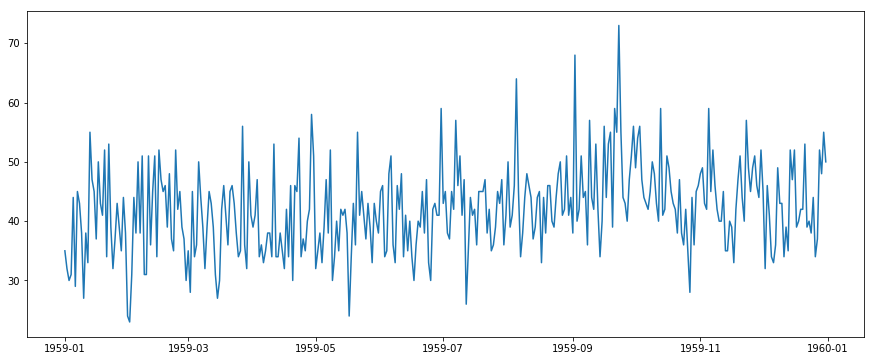

In [15]:
fig=plt.figure(figsize=(15,6))
plt.plot(birth_data.index,birth_data['DailyCount'])

for the varification of Stationary we have to check weather the dynamic mean and the dynamic variance for the given timeseries is constant or not for the given period of time if it is contant then the this is a stationary series else not.

Yes I have seen some of the pattern in it and tread/seasonality as well.
lets varify by plot the graph along with the dynamic mean and variance.

# Task 5
## a) Calculate the dynamic_mean and dynamic standard deviation of the birth_data for the window size of 12. (MM - 5)
## b) Plot the original data along with dynamic_mean and dynamic standard deviation and describe the plot in your words. Is the series stationary? (MM - 10)

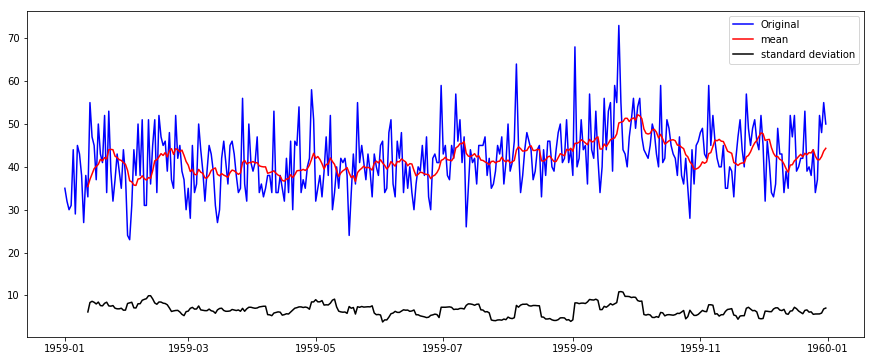

In [16]:
dynamic_mean=birth_data.DailyCount.rolling(window=12,center=False).mean()
dynamic_std=birth_data.DailyCount.rolling(window=12,center=False).std()

fig=plt.figure(figsize=(15,6))
orignal=plt.plot(birth_data.index,birth_data['DailyCount'],color='blue',label='Original')
mean=plt.plot(birth_data.index,dynamic_mean,color='red',label='mean')
std=plt.plot(birth_data.index,dynamic_std,color='black',label='standard deviation')
plt.legend(loc='best')

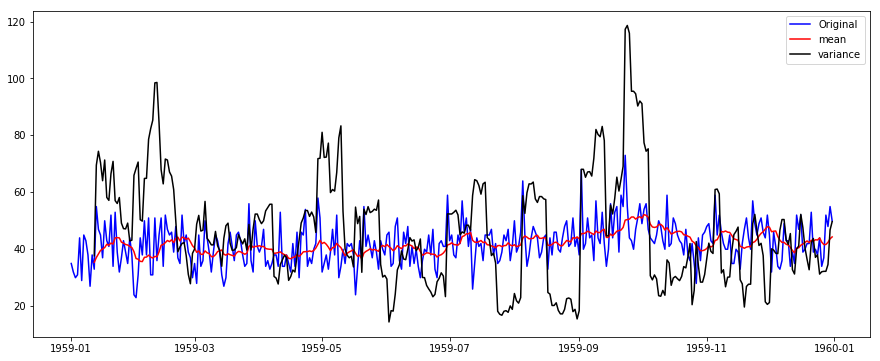

In [17]:
dynamic_var=birth_data.DailyCount.rolling(window=12,center=False).var()
fig=plt.figure(figsize=(15,6))
orignal=plt.plot(birth_data.index,birth_data['DailyCount'],color='blue',label='Original')
mean=plt.plot(birth_data.index,dynamic_mean,color='red',label='mean')
var=plt.plot(birth_data.index,dynamic_var,color='black',label='variance')
plt.legend(loc='best')

As we can see the variance is not constant and not standard deviation is also not much close to the constant so this is not a stationary time series as well.

# Task 6
## Make the series Stationary and use the relevant model for the Time Series. Store your fitted model variable named as ts_model. Give reasons for choosing your option. (MM - 25)

Decomposing the series to see the trend, seasonal, residual conponent of the time series.

In [18]:
#logtransfomation of column DailyCount
log_birth_data=np.log(birth_data.DailyCount)

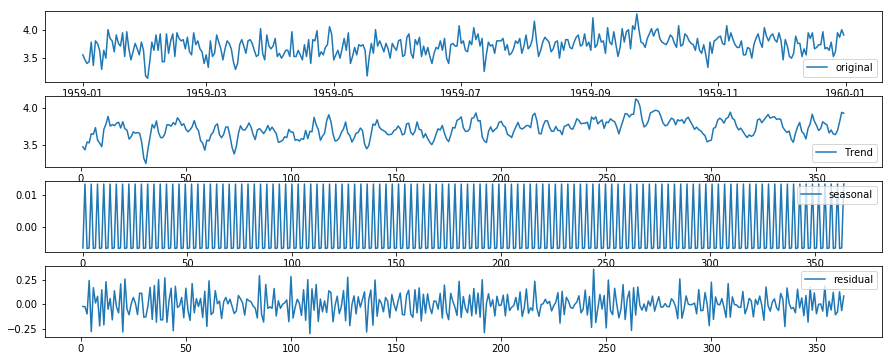

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(np.asarray(log_birth_data), freq=3)
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

fig=plt.figure(figsize=(15,6))
plt.subplot(411)
plt.plot(log_birth_data,label='original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual,label='residual')
plt.legend(loc='best')


In above plots we can see that the in seasonal regular waveform so by tanking any stationary mean we can make this stationary.

In residual it is look it stationary so can use this in furthur calculations.

#### differencing approch

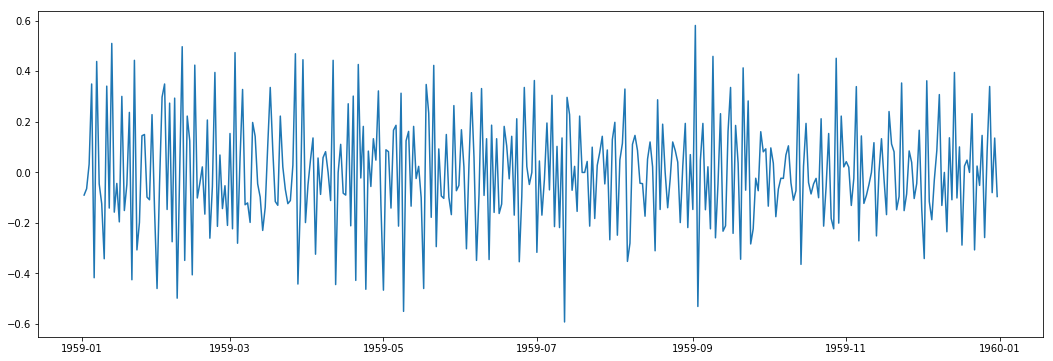

In [20]:
fig=plt.figure(figsize=(18,6))
log_birth_data_diff=log_birth_data-log_birth_data.shift()
plt.plot(log_birth_data_diff)

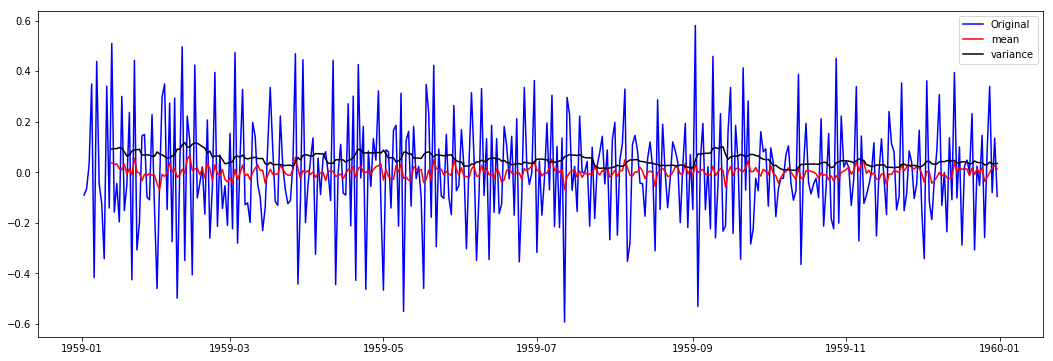

In [21]:
dynamic_mean_diff=log_birth_data_diff.rolling(window=12,center=False).mean()
dynamic_var_diff=log_birth_data_diff.rolling(window=12,center=False).var()

fig=plt.figure(figsize=(18,6))
orignal=plt.plot(birth_data.index,log_birth_data_diff,color='blue',label='Original')
mean=plt.plot(birth_data.index,dynamic_mean_diff,color='red',label='mean')
var=plt.plot(birth_data.index,dynamic_var_diff,color='black',label='variance')
plt.legend(loc='best')

Now this log difference time series is seems as stationary time series as the the mean and variance of this series is a contant along the period of time.

### Model

In [22]:
#fig=plt.figure(figsize=(15,8))
#ax1=fig.add_subplot(211)
fig1=sm.tsa.stattools.acf(log_birth_data,nlags=80)

In [23]:
#fig=plt.figure(figsize=(15,6))
#ax2=fig.add_subplot(212)
fig2=sm.tsa.stattools.pacf(log_birth_data,nlags=40,method='ols')

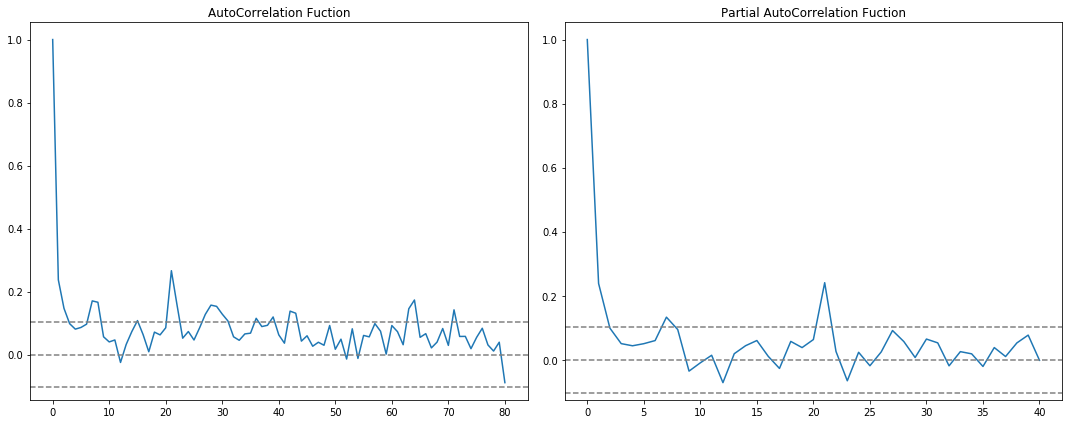

In [24]:
fig=plt.figure(figsize=(15,6))
plt.subplot(121)
plt.plot(fig1)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(log_birth_data)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(log_birth_data)),linestyle='--',color='gray')
plt.title('AutoCorrelation Fuction')

plt.subplot(122)
plt.plot(fig2)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(log_birth_data)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(log_birth_data)),linestyle='--',color='gray')
plt.title('Partial AutoCorrelation Fuction')
plt.tight_layout()

based on ACF GRAPH p value is:- 11

based on PACF GRAPH q value is:- 9

### This is a ARMA series because the series is cutoff after the nth lag he

In [65]:
ts_model=sm.tsa.ARMA(log_birth_data,(11,9)).fit(disp=False)

C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Plotting TR Model


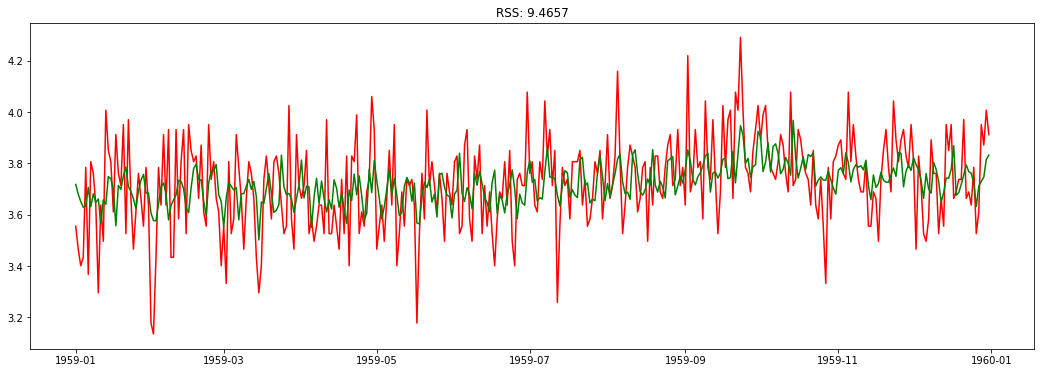

In [54]:
fig=plt.figure(figsize=(18,6))
plt.plot(log_birth_data,color='red')
plt.plot(ts_model.fittedvalues,color='green')
plt.title('RSS: %.4f'%sum((ts_model.fittedvalues-log_birth_data)**2))
print("Plotting TR Model")

###  Reason behind for choosing the ARMA Model

As we seen above that the we differing the data first for making the series as stationary series and than we plotted the acf and pacf plots and based on the acf graph we get the value as 11 and the pacf graph we get the value as 9.

based on this i have got RSS value as 9.46 approx and this is the min. value that i have got on this dataset.

We can also go with the arima model but i already calculated the diff data and making the dataset stationary so i go with ARMA model.

For more details on this i watched this Video:- https://www.youtube.com/watch?v=e8Yw4alG16Q&feature=youtu.be

# Task 7
### a) Print the Summary/Result of your fitted Model called ts_model. (MM - 5)

In [55]:
ts_model.summary()

C:\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:1455: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
C:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             DailyCount   No. Observations:                  365
Model:                    ARMA(11, 9)   Log Likelihood                 149.921
Method:                       css-mle   S.D. of innovations              0.157
Date:                Tue, 06 Nov 2018   AIC                           -255.841
Time:                        17:39:28   BIC                           -170.043
Sample:                    01-01-1959   HQIC                          -221.744
                         - 12-31-1959                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 3.7178      0.025    150.088      0.000       3.669       3.766
ar.L1.DailyCount      0.5322      0.019     27.914      0.000       0.495       0.570
ar.L2.DailyCount      0.2804      0.019     14.682      0.000       0.243       0.318
ar.L3.DailyCount      0.3868      0.012     32.977      0.000       0.364       0.410
ar.L4.DailyCount     -0.2409        nan        nan        nan         nan         nan
ar.L5.DailyCount     -0.1081      0.008    -14.359      0.000      -0.123      -0.093
ar.L6.DailyCount      0.4121        nan        nan        nan         nan         nan
ar.L7.DailyCount      0.2977        nan        nan        nan         nan         nan
ar.L8.DailyCount      0.3102        nan        nan        nan         nan         nan
ar.L9.DailyCount     -1.0268        nan        nan        nan         nan         nan
ar.L10.DailyCount     0.0954      0.021      4.533      0.000       0.054       0.137
ar.L11.DailyCount     0.0606      0.012      4.970      0.000       0.037       0.085
ma.L1.DailyCount     -0.3470      0.025    -13.655      0.000      -0.397      -0.297
ma.L2.DailyCount     -0.2607      0.012    -22.545      0.000      -0.283      -0.238
ma.L3.DailyCount     -0.4217      0.022    -19.267      0.000      -0.465      -0.379
ma.L4.DailyCount      0.1228      0.020      6.004      0.000       0.083       0.163
ma.L5.DailyCount      0.1277      0.020      6.384      0.000       0.089       0.167
ma.L6.DailyCount     -0.4328      0.023    -18.563      0.000      -0.478      -0.387
ma.L7.DailyCount     -0.3061      0.023    -13.258      0.000      -0.351      -0.261
ma.L8.DailyCount     -0.4294      0.017    -25.987      0.000      -0.462      -0.397
ma.L9.DailyCount      0.9470      0.019     48.621      0.000       0.909       0.985
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.0238           -0.0000j            1.0238           -0.5000
AR.2            -0.7176           -0.6975j            1.0007           -0.3773
AR.3            -0.7176           +0.6975j            1.0007            0.3773
AR.4            -0.2060           -0.9786j            1.0000           -0.2830
AR.5            -0.2060           +0.9786j            1.0000            0.2830
AR.6             0.6236           -0.7821j            1.0003           -0.1429
AR.7             0.6236           +0.7821j            1.0003            0.1429
AR.8             1.0032           -0.0000j            1.0032           -0.0000
AR.9             1.0140           -0.0000j            1.0140           -0.0000
AR.10            3.1123           -0.0000j            3.1123           -0.0000
AR.11           -5.0795           -0.0000j            5.0795           

### b) Plot the fitted values of the ts_model along with the Time-series used for creating Model. Describe the plot in your words. (MM - 10) 

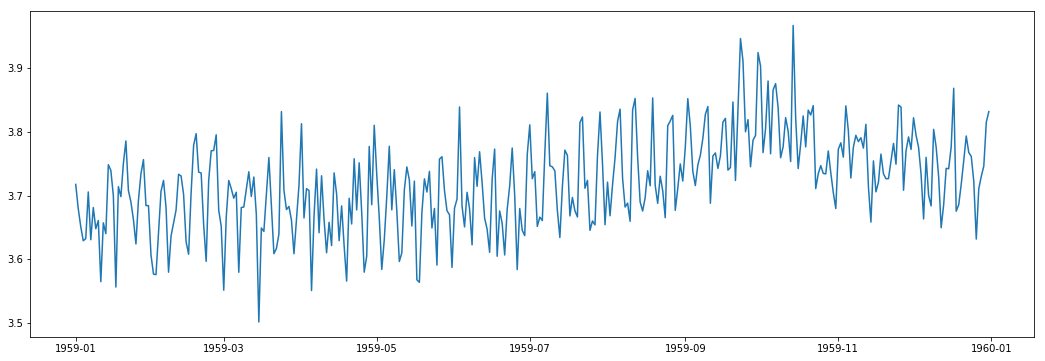

In [59]:
fig=plt.figure(figsize=(18,6))
plt.plot(birth_data.index,ts_model.fittedvalues)

we can see that the Daily total female births in California form 1959-01 -1959-06 mid somehow constant and than from 1959-07 start incresing till the 1959-10 and than again start decreasing as well.

As a whole we can see that the there is to much variations in the Daily total female births in California 1959.

# Task 8
### a) Store the residual component of the model in a variable called model_residual. (MM - 5)

In [61]:
model_residual=ts_model.fittedvalues-log_birth_data
model_residual.head()

Date
1959-01-01    0.162471
1959-01-02    0.214082
1959-01-03    0.250348
1959-01-04    0.195341
1959-01-05   -0.151457
dtype: float64

### b) Calculate the dynamic_mean and dynamic standard deviation of the model_residual for the window size of 12. Plot the model's residual data along with it's dynamic_mean and dynamic standard deviation and describe the plot in your words. (MM - 10)




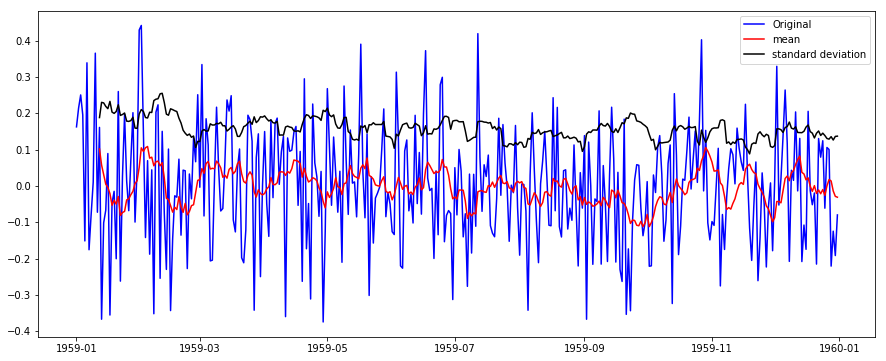

In [63]:
dynamic_mean=model_residual.rolling(window=12,center=False).mean()
dynamic_std=model_residual.rolling(window=12,center=False).std()

fig=plt.figure(figsize=(15,6))
orignal=plt.plot(birth_data.index,model_residual,color='blue',label='Original')
mean=plt.plot(birth_data.index,dynamic_mean,color='red',label='mean')
std=plt.plot(birth_data.index,dynamic_std,color='black',label='standard deviation')
plt.legend(loc='best')